In [1]:
from IPython.display import display, clear_output

In [53]:
from copy import deepcopy

from scipy.spatial.distance import euclidean
import numpy as np
from sklearn import datasets

import matplotlib.pyplot as plt

from ipywidgets import interactive
import ipywidgets as widgets

In [3]:
n_samples = 2000

In [4]:
k = 7

In [5]:
blobs = datasets.make_blobs(n_samples=n_samples,centers=k, random_state=20)

In [6]:
data_tab = blobs[0]
colors = blobs[1]

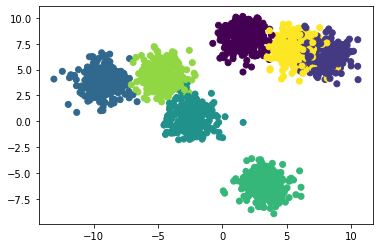

In [7]:
plt.scatter(data_tab[:,0],data_tab[:,1],c=colors)

In [8]:
nb_iter = 10

In [9]:
inertia_min = -1.

In [10]:
member_final=np.empty_like(colors)
centroids_final = np.zeros((k,data_tab.shape[1]))

In [11]:
#1st method: we choose k random points as initial centroids
centroids_i = np.random.choice(n_samples,k,replace=False)
centroids = data_tab[centroids_i]
    
member=np.empty_like(colors)
    
cmpt = 0
conti = 1

In [12]:
def next_step(member, centroids, cmpt):
    member_cpy = deepcopy(member)
    
    for i, x in enumerate(data_tab):
        dist_x = euclidean(x,centroids[k-1])
        member[i] = k-1
        for j in range(k-1):
            if euclidean(x,centroids[j]) < dist_x:
                dist_x = euclidean(x,centroids[j])
                member[i] = j

    #plot the scatter for this step
    cmpt += 1
    plt.scatter(data_tab[:,0],data_tab[:,1],c=member)
    
    #compute the new centroids
    for j in range(k):
        centroids[j] = np.asarray([elt for i, elt in enumerate(data_tab) if member[i]==j]).mean(axis=0)
    
    plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x")
    clear_output()
    print("step number:",cmpt)
    plt.show()
    
    # Computing inertia
    inertia = 0.
    for i, x in enumerate(data_tab):
        inertia+=euclidean(x,centroids[member[i]])**2
    
    print(f"inertia: {inertia}")
    
    change = max(np.absolute(member-member_cpy))
    if change == 0:
        print("No change from last step !")
        
    return cmpt

In [13]:
def affect_members(member, centroids):
    for i, x in enumerate(data_tab):
        dist_x = euclidean(x,centroids[k-1])
        member[i] = k-1
        for j in range(k-1):
            if euclidean(x,centroids[j]) < dist_x:
                dist_x = euclidean(x,centroids[j])
                member[i] = j
    
    # Computing inertia
    inertia = 0.
    for i, x in enumerate(data_tab):
        inertia+=euclidean(x,centroids[member[i]])**2
    
    print(f"inertia: {inertia}")
                
    plt.scatter(data_tab[:,0],data_tab[:,1],c=member)
    plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x")

    plt.show()
    
    print("Members affected")

In [14]:
def update_centroids(member, centroids):
    #compute the new centroids
    for j in range(k):
        centroids[j] = np.asarray([elt for i, elt in enumerate(data_tab) if member[i]==j]).mean(axis=0)
    
    # Computing inertia
    inertia = 0.
    for i, x in enumerate(data_tab):
        inertia+=euclidean(x,centroids[member[i]])**2
    
    print(f"inertia: {inertia}")
    
    plt.scatter(data_tab[:,0],data_tab[:,1],c=member)
    plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x")

    plt.show()
    
    print("centroids updated")

In [15]:
button = widgets.Button(description="Next step")

In [16]:
reset_button = widgets.Button(description="Reset")

In [17]:
start_button = widgets.Button(description="Start")

In [18]:
output = widgets.Output()

In [19]:
output.layout.height = '350px'

In [20]:
def reset_centroids(centroids):
    plt.scatter(data_tab[:,0],data_tab[:,1],c="gray")
    plt.scatter(centroids[:,0], centroids[:,1], c="black", marker="x")
    plt.show()
    
    print("centroids reset")

In [21]:
centroids_i = np.random.choice(n_samples,k,replace=False)
centroids = data_tab[centroids_i]
cmpt = 0

member=np.empty_like(colors)

substep1 = True

def init_or_reset():
    global centroids
    global cmpt
    global member
    global substep1
    
    member=np.empty_like(colors)
    centroids_i = np.random.choice(n_samples,k,replace=False)
    centroids = data_tab[centroids_i]
    cmpt = 0
    substep1 = True
    
    with output:
        clear_output()
        print("inertia: None")
        reset_centroids(centroids)
        
def on_start_clicked(b):
    clear_output()
    display(button, reset_button, output)
    init_or_reset()
    
def on_button_clicked(b):
    global member
    global centroids
    global cmpt
    global substep1
    with output:
        clear_output()
        if substep1:
            affect_members(member, centroids)
            substep1 = False
        else:
            update_centroids(member, centroids)
            substep1 = True
            
def on_reset_clicked(b):
    init_or_reset()

In [22]:
button.on_click(on_button_clicked)

In [23]:
reset_button.on_click(on_reset_clicked)

In [24]:
start_button.on_click(on_start_clicked)

In [25]:
display(start_button, output)

Button(description='Next step', style=ButtonStyle())

Button(description='Reset', style=ButtonStyle())

Output(layout=Layout(height='350px'))

In [37]:
from sklearn.cluster import KMeans

In [38]:
blobs[0].shape

(2000, 2)

In [51]:
def f(k):
    kmeans = KMeans(n_clusters=k).fit(blobs[0])
    plt.scatter(blobs[0][:,0], blobs[0][:,1], c=kmeans.labels_)
    print(kmeans.labels_)

In [58]:
interactive_plot = interactive(f, k=10)
output = interactive_plot.children[-1]
output.layout.height = '350px'

In [59]:
interactive_plot

interactive(children=(IntSlider(value=10, description='k', max=30, min=-10), Output(layout=Layout(height='350p…